#  <center>Module 8 Homework
## <center>ISE-529
## <center>Aditya Shrikant Chavan
## <center>USC ID 8741411805 

1)  This problem uses Poisson regression to model data on suicide rates by country (couts per 10,000 population) in 2015 based on the existence of a mental health plan in the country in 2011 (1 = no, 2 = yes) and the number of pysychiatrists in the country in 2011 (per 100,000 population).

1a)  Read in the dataset from the file "Suicide Rates by Country - 2015" and create a histogram of the counts of suicides per 10,000 population ("rates")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

,country,plan,psych,rates,male_rates
0,1,2,0.16,55,83
1,2,2,1.83,43,59
2,3,2,1.55,31,50
3,4,2,0.02,205,295
4,5,1,1.13,0,0
...,...,...,...,...,...
165,167,2,0.00,58,87
166,168,2,1.01,74,112
167,169,1,0.21,82,106
168,170,2,0.03,64,99


Text(0, 0.5, 'Occurences')

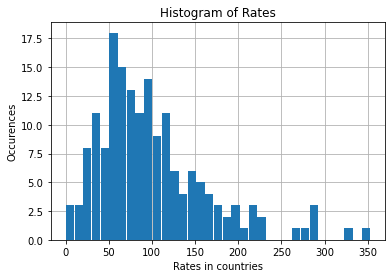

In [2]:
data=pd.read_csv("Suicide Rates by Country - 2015.csv")
display(data)
data.hist(column=['rates'],bins=35,grid=True,zorder=2, rwidth=0.95)
plt.title('Histogram of Rates')
plt.xlabel('Rates in countries')
plt.ylabel('Occurences')

1b)  Does this histogram appear to indicate that this variable follows a Poisson or a Gaussian distribution?

The histogram shows us that the variable follows a Poisson distribution.

1c)  Run a Poisson regression using "plan" and "psych" as the predictors and "rates" as the response variable.  Display the resulting coefficients.  Use the full dataset (do not create partitions)

In [3]:
response_variable=data['rates']
predictor_variables=data[['plan','psych']]
model= linear_model.PoissonRegressor()
model.fit(predictor_variables,response_variable)
print(model.intercept_)
print(f'Coefficients are {model.coef_}')

4.395662033507743
Coefficients are [0.05364156 0.02570458]


1D)  What would be the expected number of suicides per 10,000 population for a country that had a health plan and had 10 psychiatrists per 100,000 population?  

In [4]:
pred=model.predict([[2,10]])
print(f'Expexted number of suicides are {np.round(pred,3)}')

Expexted number of suicides are [116.745]


1E) For this country (from 1D), what is the probability that there would be 100 suicides (per 10,000 population)?

In [5]:
probab = ((np.exp(-(pred))*((pred)**100))/np.math.factorial(100))
print(f'Probability of 100 suicides is {probab}')

Probability of 100 suicides is [0.011275201791984657]


1f)  For this country (from 1D), what is the probability that there would be between 100 and 120 suicides (inclusive).  Assume that the counts are all integers (they have been rounded).

In [6]:
npcounts=np.arange(100,120+1)
poisson_prob = []
for i in npcounts:
 pp = (np.exp(-pred)*(pred**(i)))/np.math.factorial(i)
 poisson_prob.append(pp)
answer = np.sum(poisson_prob)
print(f'Probability of 100 to 120 suicides is {np.round(answer,3)}')

Probability of 100 to 120 suicides is 0.589
